In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Classificação de texto

In [2]:
#Verifica os dados no diretorio

Data = os.listdir("../../Filter/Tweets_Filtered/")
for i in range(len(Data)):
    Data[i] = Data[i].split(".")[0]
    
print(Data)

['cartacapital', 'conexaopolitica', 'EstadaoEconomia', 'EstadaoPolitica', 'folha', 'folha_mercado', 'folha_poder', 'g1', 'g1economia', 'g1politica', 'GloboNews', 'hbredda', 'jairbolsonaro', 'OGloboPolitica', 'OGlobo_Economia', 'pedrocerize', 'RevistaEpoca', 'RevistaISTOE', 'UOL', 'UOLEconomia', 'valoreconomico', 'VEJA']


In [3]:
Pessoas = ["realDonaldTrump", "jairbolsonaro", "hbredda", "gui_benchimol", "pedrocerize"]

NoticiasPolitica = ["OGloboPolitica", "folha_poder", "GloboNews", "EstadaoPolitica", 
                    "RevistaEpoca", "valoreconomico", "g1politica", "conexaopolitica", "EstadaoEconomia", 
                    "UOLEconomia", "folha_mercado", "g1economia", "OGlobo_Economia"]

Noticias = ["UOL", "folha", "g1", "VEJA", "cartacapital", "RevistaISTOE"]

In [4]:
#Monta um dicionario com todos datasets de twites de todas as pessoas
Alvo = NoticiasPolitica


AllData = {}

for i in Alvo:
    if i in Data:
        AllData[i] = pd.read_csv("../../Filter/Tweets_Filtered/{0}".format(i+".csv"), sep=";", decimal=",", encoding='utf-16')
    else:
        print("{0} não disponivel".format(i))

In [5]:
printrange = range(0, 5)
print("-"*10)
for i in printrange:
    print(AllData[Alvo[0]]["Texto"].iloc[i])
    print("-"*10)

----------
carlos ignora ponto final do pai e volta a atacar mourão estranhíssimo alinhamento com políticos que detestam o… 
----------
polícia civil deflagra operação em todo o país contra foragidos da justiça 
----------
análise decisão do stj sobre lula não muda situação do pt 
----------
bom dia leitor siga aqui as principais notícias da política nacional e os acontecimentos mais importantes pelo pa… 
----------
lula pode ser solto após decisão do stj entenda 
----------


In [6]:
AllX = {}

for i in Alvo:
    AllX[i] = list(AllData[i]["Texto"])

In [7]:
print(AllX[Alvo[0]][0:3])

['carlos ignora ponto final do pai e volta a atacar mourão estranhíssimo alinhamento com políticos que detestam o… ', 'polícia civil deflagra operação em todo o país contra foragidos da justiça ', 'análise decisão do stj sobre lula não muda situação do pt ']


In [8]:
X = []

for i in Alvo:
    X = X + AllX[i]

# Análise de tópicos

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

min_ocur=0.0005
Stop = ["istoégente", "expressoepoca", "globonews", "estudioi", "rt", "andreiasadi"]

vec = CountVectorizer(max_df=0.15, min_df=min_ocur, stop_words=Stop)
tf = vec.fit_transform(X)

In [10]:
tf_feature_names = vec.get_feature_names()
len(tf_feature_names)

2984

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

n_components = 30

lda = LatentDirichletAllocation(
    n_components=n_components, max_iter=5, 
    learning_method='online', learning_offset=50., 
    n_jobs=-1, verbose=1)

lda.fit(tf)

In [12]:
#usado para dar uma ideia mais ou menos do que são os tópicos
n_top_words = 20
for topic_idx, topic in enumerate(lda.components_):
    print("Tópico {}".format(topic_idx))
    sorted_idx = topic.argsort()
    N = len(topic) if len(topic) < n_top_words else n_top_words
    for k in sorted_idx[:-n_top_words - 1:-1]:
        print("{}: {:.2f}".format(tf_feature_names[k], topic[k]))
    print()

Tópico 0
vai: 1061.31
feira: 712.21
nesta: 425.42
no: 332.08
operação: 275.73
polícia: 251.10
cabral: 240.94
terça: 232.35
diz: 220.71
alvo: 219.26
senado: 204.80
cinco: 198.39
com: 187.92
mais: 180.84
país: 161.08
às: 160.60
civil: 157.87
suzano: 156.44
sexta: 154.10
bancada: 148.40

Tópico 1
brumadinho: 1514.07
vale: 617.60
tragédia: 378.37
barragem: 346.31
vítimas: 315.85
rompimento: 269.54
buscas: 220.14
desaparecidos: 173.81
meio: 166.17
mg: 163.17
ambiente: 153.56
lama: 150.06
auxílio: 143.18
funcionários: 125.75
parte: 121.56
presídios: 119.91
parentes: 102.17
moradia: 101.71
familiares: 90.66
bombeiros: 80.15

Tópico 2
na: 3376.94
veja: 396.30
anos: 389.42
critica: 255.71
mais: 202.89
delação: 182.06
brasileiros: 150.77
fala: 149.50
lista: 131.52
câmara: 116.08
joice: 115.49
equipe: 108.14
casa: 104.01
com: 98.23
mudança: 87.35
ccj: 83.67
mundo: 78.62
assembleia: 75.21
aberta: 73.33
tv: 72.32

Tópico 3
será: 417.01
família: 260.52
bolsa: 134.67
fotos: 100.00
indica: 86.97
bilhõ

In [13]:
import pickle

# Store data (serialize)
with open('./Models/lda_fited_30.pickle', 'wb') as handle:
    pickle.dump(lda, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('./Models/cv_fited.pickle', 'wb') as handle:
    pickle.dump(vec, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Carrega o modelo se aplicavel

In [14]:
import pickle

# Store data (serialize)
with open('./Models/lda_fited_30.pickle', 'rb') as handle:
    lda = pickle.load(handle)
    
with open('./Models/cv_fited.pickle', 'rb') as handle:
    vec = pickle.load(handle)

## Filtra os dataframes para agrupar os tweets

In [15]:
import datetime

DateInterval = [datetime.datetime.strptime("17:00:00", "%H:%M:%S").time(), 
                datetime.datetime.strptime("9:00:00", "%H:%M:%S").time()]

oneday = datetime.timedelta(days=1)
daytweets = []
tweets_data = {}

for i in Alvo:
    datas = AllData[i]['Data']
    tweets = AllData[i]['Texto']
    likes = AllData[i]['Likes']
    retweets = AllData[i]['Retweets']
    Started = True
    lastday = datetime.datetime.strptime(datas[0], '%Y-%m-%d %H:%M:%S').date()
    
    for j in range (0, len(datas)):
        
        data = datetime.datetime.strptime(datas[j], '%Y-%m-%d %H:%M:%S').date()
        time = datetime.datetime.strptime(datas[j], '%Y-%m-%d %H:%M:%S').time()
        
        if data != lastday:
            delta = abs(int(str(data - lastday).split(" ")[0]))
            if int(delta) >= 2:
                #Acaba o periodo por força bruta
                Started = False
                if(str(data) not in tweets_data):
                    tweets_data[str(data)] = daytweets
                else:
                    for k in daytweets:
                        tweets_data[str(data+oneday)].append(k)
                daytweets = []
        
        #Test to 00:00
        First = (DateInterval[0] < time) and (time < datetime.datetime.strptime("23:59:59", "%H:%M:%S").time())
        #Test from 00:00
        Second = (datetime.datetime.strptime("00:00:01", "%H:%M:%S").time() < time) and (time < DateInterval[1])

        if First or Second:
            Started = True
            #Esta dentro do periodo
            daytweets.append(tweets[j])

        elif Started:
            #Acaba o periodo
            Started = False
            if(str(data+oneday) not in tweets_data):
                tweets_data[str(data+oneday)] = daytweets
            else:
                for k in daytweets:
                    tweets_data[str(data+oneday)].append(k)
            daytweets = []
                
        lastday = data

Dates = list(tweets_data.keys())

for i in range(3):
    print(Dates[i], tweets_data[Dates[i]][0:2])

2019-04-25 ['rt expressoepoca desistência de márcio lacerda agita eleições em minas gerais ex prefeito de belo horizonte abriu mão da candidatura nest…', 'rt expressoepoca stj solta executivo de multinacional da área da saúde preso na lava jato trata se de antonio georgete ']
2019-04-24 ['lula pode ser solto após decisão do stj entenda ', 'advogado de lula promete apresentar todos os recursos que lei permite para absolvê lo ']
2019-04-23 ['dono oficial do sítio de atibaia pede autorização judicial para vendê lo ', 'defesa de lula diz que não foi intimada sobre julgamento no stj pautado para terça ']


## Filtra as ações

In [16]:
Stocks = ["ibov", "ITUB4", "PETR4", "Vale3", "BBDC4", "ABEV3", "BBAS3", "SANB3", "LREN3"]

Cols = {}
for i in range(len(Stocks)):
    Cols[Stocks[i]] = [i*4+i, i*4+i+1, i*4+i+2, i*4+i+3]

In [17]:
Var = 'PETR4'
bolsa = pd.read_excel('../../Dados_Bolsa/Twt.xlsx', sheet_name="1h", usecols=Cols[Var],  skiprow=[0])

In [18]:
headers = list(bolsa.keys())
myheaders = [Var, "Price", "Volume", "Ticks"]

for i in range(len(headers)):
    bolsa.rename(columns={headers[i]: myheaders[i]}, inplace=True)

bolsa = bolsa.drop([1])
bolsa = bolsa.dropna()

In [19]:
bolsa.head(5)

,PETR4,Price,Volume,Ticks
2,2018-10-09 10:00:00,26.53,16993100,16015
3,2018-10-09 11:00:00,26.69,17752300,13529
4,2018-10-09 12:00:00,26.79,7840900,9768
5,2018-10-09 13:00:00,26.83,8244300,9649
6,2018-10-09 14:00:00,26.84,7674700,8604


In [20]:
ibov_len  = len(bolsa[Var])
ibov_len

1099

In [21]:
import datetime

ibov_data_precos = {}
DeadZone = 0.25
# célula para identificar os preços de abertura e fechamento de cada dia
for i in range(0, ibov_len):
    data_completa = datetime.datetime.strptime(str(bolsa[Var].iloc[i]), '%Y-%m-%d %H:%M:%S')
    preco = bolsa['Price'].iloc[i]
    data = data_completa.strftime("%Y-%m-%d")
    if data not in ibov_data_precos:
        ibov_data_precos[data] = {}
        ibov_data_precos[data]['abertura'] = preco
        #caso só tenhamos informação de uma hora dentro de um dia, assumimos esse preco como o de fechamento tbm
        ibov_data_precos[data]['fechamento'] = preco 
        dia_anterior_completo =  data_completa - datetime.timedelta(days=1)
        dia_anterior_data = dia_anterior_completo.strftime("%Y-%m-%d")
        
        if(dia_anterior_data in ibov_data_precos):
            dia_anterior_fechamento = ibov_data_precos[dia_anterior_data]['fechamento']
            
            if(preco > dia_anterior_fechamento + DeadZone):
                ibov_data_precos[data]['variacao'] = 2 #Subiu
            elif (preco < dia_anterior_fechamento - DeadZone):
                ibov_data_precos[data]['variacao'] = 0 #Desceu
            else:
                ibov_data_precos[data]['variacao'] = 1
        else:
            #se não tivermos informações sobre o dia anterior, assumimos que a variacao foi neutra
            ibov_data_precos[data]['variacao'] = 0 
    else:
        if i < (ibov_len - 1):
            data_seguinte = datetime.datetime.strptime(str(bolsa[Var][i+1]), '%Y-%m-%d %H:%M:%S')
            if data_seguinte.date() > data_completa.date():
                ibov_data_precos[data]['fechamento'] = preco

Datesibov = list(ibov_data_precos.keys())
                
for i in range(4):
    print(Datesibov[i], ibov_data_precos[Datesibov[i]])

2018-10-09 {'abertura': 26.53, 'fechamento': 26.53, 'variacao': 0}
2018-10-10 {'abertura': 25.87, 'fechamento': 25.87, 'variacao': 0}
2018-10-11 {'abertura': 26.35, 'fechamento': 26.35, 'variacao': 2}
2018-10-15 {'abertura': 25.68, 'fechamento': 25.68, 'variacao': 0}


## Cria os Datasets

In [22]:
#Para criar sem covariancia e 5 dias (std scaler)

from sklearn.covariance import EmpiricalCovariance
from sklearn.preprocessing import StandardScaler

std = StandardScaler(with_mean = False)
cov = EmpiricalCovariance()

model = lda

lastdays = [0, 0, 0, 0, 0]
lastday = 0
X = []
y = []
for data in ibov_data_precos:
    if(data in tweets_data):
        #Utiliza modelos para gerar os dados
        tweet_counterized = vec.transform(tweets_data[data])
        result = model.transform(tweet_counterized)
        #Usa standar scaler nas features
        stdresults = std.fit_transform(result)
        
        #Faz a matriz de covariancia e a vetoriza
        cov.fit(stdresults)
        covariance = list(np.concatenate(cov.covariance_))
        
        #Faz a media dos tópicos
        topic_mean = list(np.mean(stdresults, axis=0))
        
        #Faz uma lista dos resultados dos ultimos 5 dias
        lastdays.append(lastday)
        del(lastdays[0])
        
        #Salva os topicos + covariancias no x
        datex = (list(covariance) + list(topic_mean) + list(lastdays))
        X.append(datex)
        y.append(ibov_data_precos[data]['variacao'])
        
        #Lembra coisad do ultimo dia
        lastday = ibov_data_precos[data]['variacao']

In [23]:
print(len(X[0]), len(y))

935 127


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
PCAx = pca.fit_transform(X)

In [25]:
#x = PCAx
x = X

## Análse dos Dados

In [26]:
print(len(x[0]), len(y))

935 127


In [27]:
my_rounded_list = [round(elem, 2) for elem in covariance]

my_rounded_list.count(1)

30

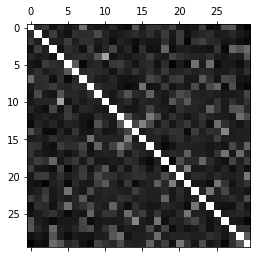

In [28]:
plt.matshow(cov.covariance_, cmap=plt.cm.gray)
plt.show()

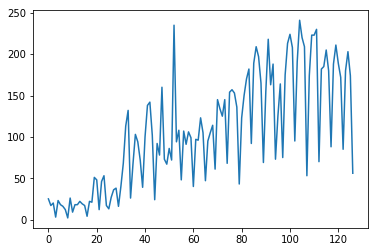

In [29]:
Lens = [len(tweets_data[data]) for data in ibov_data_precos if data in tweets_data]
plt.plot(Lens)

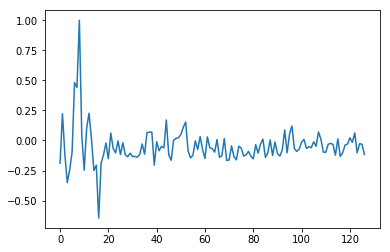

In [30]:
plt.plot(np.array(X)[:, 5])

In [31]:
print("Numero de 0s:", y.count(0))
print("Numero de 1s:", y.count(1))
print("Numero de 2s:", y.count(2))

Numero de 0s: 64
Numero de 1s: 36
Numero de 2s: 27


In [32]:
print("Proporção de 0s:", y.count(0)/len(y))
print("Proporção de 1s:", y.count(1)/len(y))
print("Proporção de 2s:", y.count(2)/len(y))

Proporção de 0s: 0.5039370078740157
Proporção de 1s: 0.28346456692913385
Proporção de 2s: 0.2125984251968504


## Aplicação de Modelos

In [33]:
from sklearn.model_selection import cross_val_predict, cross_val_score

### Regressão Logistica

In [34]:
from sklearn.linear_model import LogisticRegression

Losgisticclf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

scores = cross_val_score(Losgisticclf, x, y, cv=3, n_jobs=-1)

print(scores)
print(np.mean(scores))

[0.51162791 0.45238095 0.38095238]
0.4483204134366925


### Decision Tree

In [35]:
from sklearn import tree

tree = tree.DecisionTreeClassifier()

scores = cross_val_score(tree, x, y, cv=3, n_jobs=-1)

print(scores)
print(np.mean(scores))

[0.39534884 0.42857143 0.35714286]
0.393687707641196


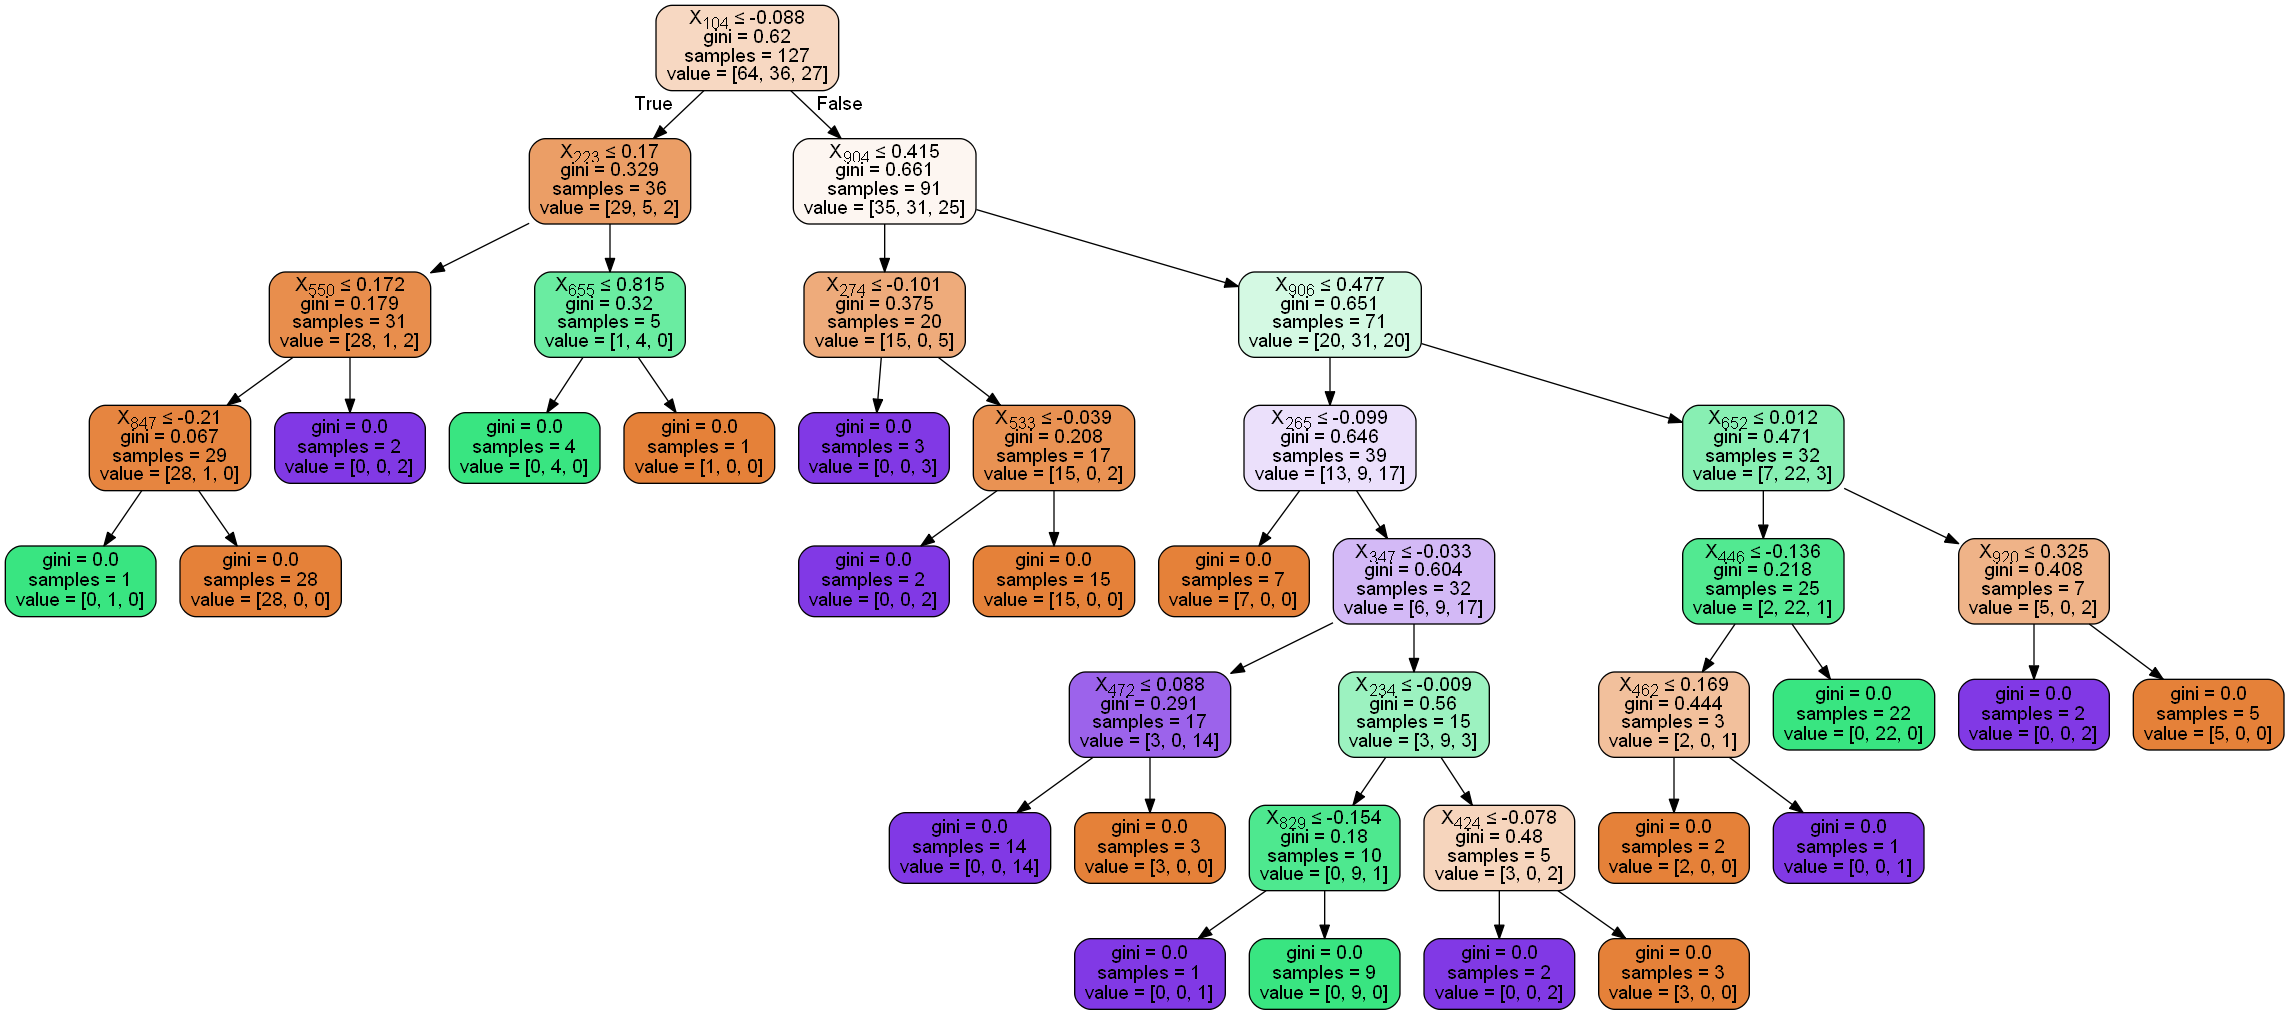

In [36]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

tree.fit(x, y)

dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Randon Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

RandonForestclf = RandomForestClassifier(n_estimators=10, n_jobs=-1)

scores = cross_val_score(RandonForestclf, x, y, cv=3, n_jobs=-1)

print(scores)
print(np.mean(scores))

[0.48837209 0.47619048 0.38095238]
0.4485049833887043


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 30, 100], 
    'min_impurity_decrease': [1e-3, 1e-4, 1e-5, 1e-6, 0]}
  ]

RandonForestclf = RandomForestClassifier(n_estimators=10, min_impurity_decrease=1e-3)

grid_search = GridSearchCV(RandonForestclf, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)

grid_search.fit(x, y)

print(grid_search.best_params_, grid_search.best_score_)

BestParams = grid_search.best_params_

RandonForestclf = RandomForestClassifier(n_estimators=BestParams["n_estimators"], 
                                         min_impurity_decrease=BestParams["min_impurity_decrease"])

{'min_impurity_decrease': 0, 'n_estimators': 100} 0.5196850393700787


C:\Users\edufe\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### SVM

In [39]:
from sklearn.svm import SVC

SVMclf = SVC(gamma="scale", tol=1e-3, probability=True)

scores = cross_val_score(SVMclf, x, y, cv=3, n_jobs=-1)

print(scores)
print(np.mean(scores))

[0.51162791 0.5        0.5       ]
0.5038759689922481


### Voting classifier

In [40]:
from sklearn.ensemble import VotingClassifier

VotingHard = VotingClassifier(estimators=[('LR', Losgisticclf), ('SVM', SVMclf), ('RF', RandonForestclf)],
                              voting='hard', n_jobs=-1)

scores = cross_val_score(VotingHard, x, y, cv=5, n_jobs=-1)

print(scores)
print(np.mean(scores))

[0.48148148 0.5        0.52       0.52       0.54166667]
0.5126296296296295


## Best Model

In [41]:
TopClassifier = RandonForestclf

y_pred = cross_val_predict(TopClassifier, x, y, cv=3)
print(y_pred)
print(y)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0]
[0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0]


In [42]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y, y_pred)
conf_mx

array([[59,  5,  0],
       [32,  4,  0],
       [19,  8,  0]], dtype=int64)

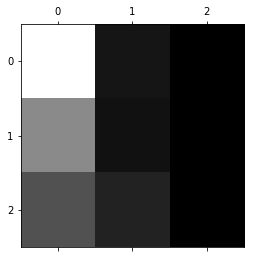

In [43]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()